<a href="https://colab.research.google.com/github/jakubweglowski/Machine-Learning-Summer-2024-25/blob/main/Homework05_kernel-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

First, we recall the plot - both in 2D and 3D:

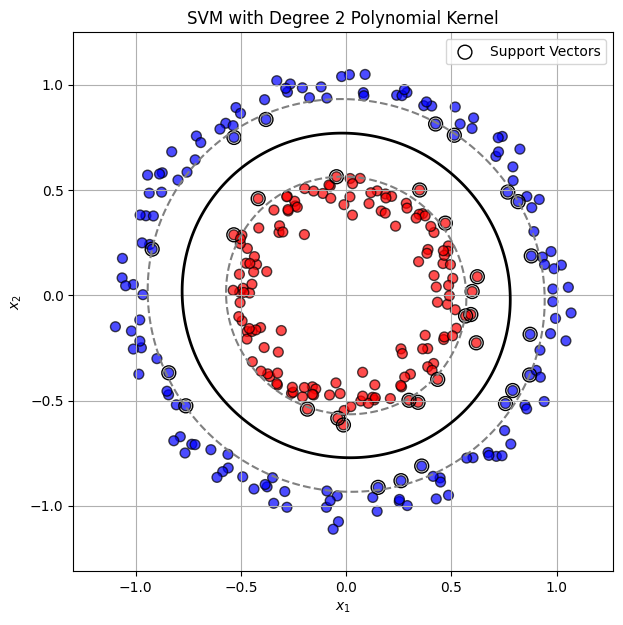

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

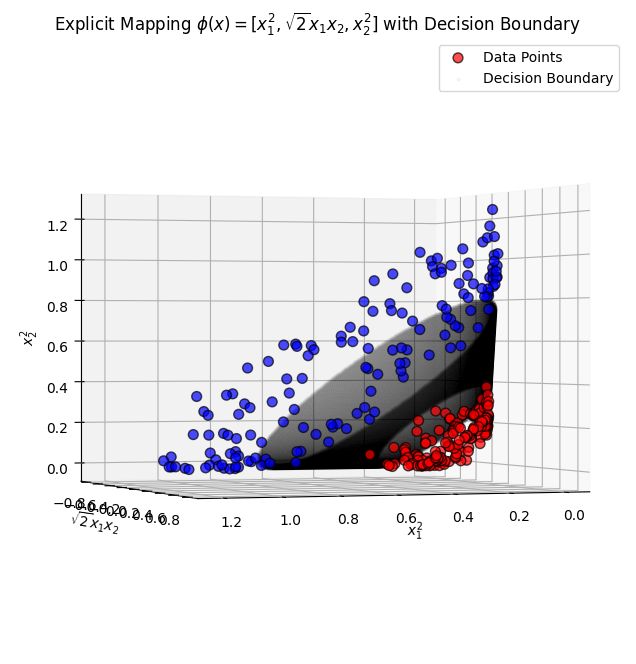

In [ ]:
# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0.0, atol=0.75)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, alpha=0.03, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)
ax.view_init(0, 70, 0)

plt.show()

The mapping $\phi(.)$ allows for linear separation in high-dimensional feature space (here: 3D). Since the mapping is non-linear, it curves the original (here: 2D) data space. The decision boundary in the original 2D space is some kind of curve and there is no good reason to believe that it becomes a "flat" hyperplane after transforming it using non-linear function $\phi(.)$. For example, on the plot above we can see that $\phi(.)$ has mapped the flat 2D space onto some paraboloid embedded in 3D.

The key point here is that after transformation we can find a "flat" hyperplane that will separate the points in 3D. We can see that on the plot above that it is indeed possible to find such a hyperplane. When we find such a "flat" hyperplane in 3D, we can then intersect it with the non-linear surface obtained via transformation $\left(x\mapsto \phi(x)\right)$ and, after that, transform it backwards into 2D. From such a procedure we will get a non-linear decision boundary visible in 2D, eg. circle separating datapoints.

# **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

A "flat" plane in 3D is given by $a_1x_1 + a_2x_2 + a_3x_3 = c$. We also have $\phi(x_1', x_2') = (x_1'^{\ 2}, \sqrt{2}x_1'x_2', x_2'^{\ 2})$. If we intersect the "flat" plane with the surface obtained with data mapping via $\phi(.)$, we obtain
$$(x_1, x_2, x_3) = (x_1'^{\ 2}, \sqrt{2}x_1'x_2', x_2'^{\ 2})$$
having $a_1x_1 + a_2x_2 + a_3x_3 = c$. We have:
$$a_1x_1'^{\ 2} + a_2\sqrt{2}x_1'x_2' + a_3x_2'^{\ 2} = c$$
which is an equation of the form $Ax^2+Bxy+Cy^2 = D$, which describes an ellipse in 2D provided that $B^2-4AC < 0$ (we assume $a_1, a_2, a_3$ are such that it holds).

To visualise this phenomenon, we include some plots:

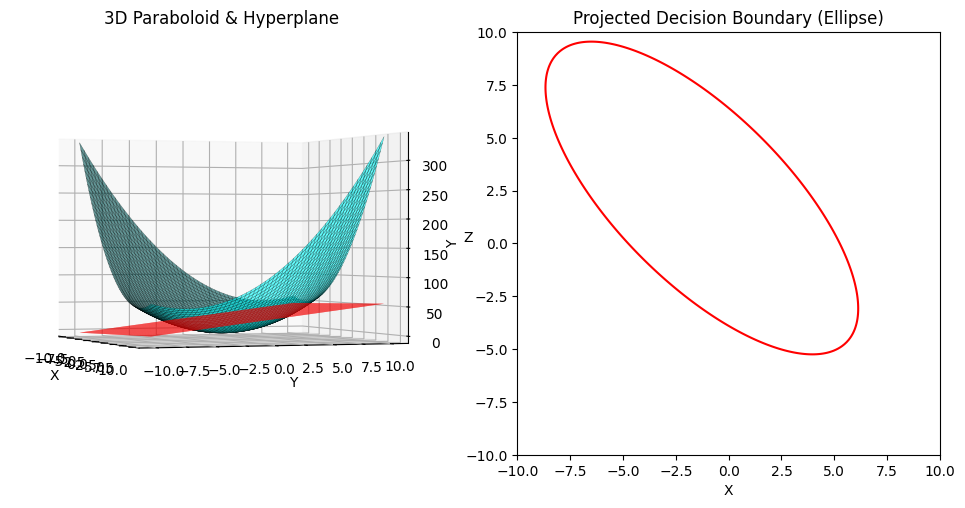

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 2D grid in (x, y)
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Feature transformation (lifting to 3D paraboloid)
Z = X**2 + np.sqrt(2)*X*Y + Y**2

# Define a hyperplane in 3D: w1*x + w2*y + w3*z + b = 0
w1, w2, w3, b = 1, 5, -2, 50  # Example coefficients
plane_Z = (w1 * X + w2 * Y + b) / -w3  # Solve for Z

# Plot the paraboloid and the hyperplane intersection
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6, color='cyan', edgecolor='k', linewidth=0.2)
ax.plot_surface(X, Y, plane_Z, alpha=1, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(0, -20, 0)
ax.set_title('3D Paraboloid & Hyperplane')

# Compute intersection curve (Z = X^2 + Y^2 constraint)
contour = (w1 * X + w2 * Y + w3 * Z + b)  # Should be 0 where the plane cuts
levels = [0]  # Extract the intersection

# Plot the 2D projection of the intersection
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, contour, levels, colors='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Projected Decision Boundary (Ellipse)')
ax2.set_aspect('equal')

plt.show()